<a href="https://colab.research.google.com/github/geekysumant/covid-detection/blob/master/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [35]:
pip install https://github.com/raghakot/keras-vis/archive/master.zip

     \ 67.2MB 4.1MB/s
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=30855 sha256=69fbbd28d0655d00183655f1af4510ad9f7b6ab377836a32c6f2101ea89e9255
  Stored in directory: /tmp/pip-ephem-wheel-cache-y6imaq72/wheels/7e/91/e5/9fdb0f2f5fa5d9f402c6fbfaf015aadbe3dba024ede6532727
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [0]:
root_path='gdrive/My Drive/covid-data'

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image 
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from keras import activations


In [0]:
os.chdir(root_path)

In [5]:
os.listdir()

['covid_data.zip',
 'CovidDataset',
 'DL_utils.py',
 'output.jpeg',
 'covid-detector.h5',
 'model.png']

In [0]:
!unzip covid_data.zip

Archive:  covid_data.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb

In [0]:
train_path="CovidDataset/Train"
val_path="CovidDataset/Val"

In [0]:
#model generation

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(AveragePooling2D((3,3)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))



 

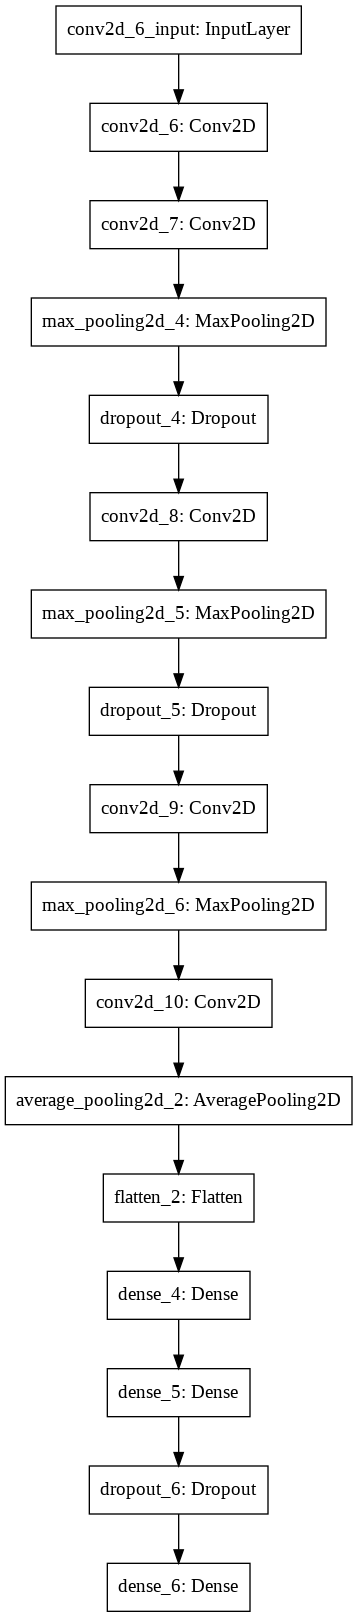

In [16]:
plot_model(model, to_file='model.png')

OUR DEEP LEARNING MODEL ARCHITECTURE

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [0]:
 train_datagen=image.ImageDataGenerator(
     rescale=1./255,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True
 )
 test_datagen=image.ImageDataGenerator(rescale=1./255)

In [20]:
train_generator=train_datagen.flow_from_directory(
    "CovidDataset/Train",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 224 images belonging to 2 classes.


In [21]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [22]:
validation_generator=test_datagen.flow_from_directory(
    "CovidDataset/Val",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 60 images belonging to 2 classes.


In [23]:
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/20
8/8 [==============================] - 73s 9s/step - loss: 0.7075 - accuracy: 0.5391 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 0.6553 - accuracy: 0.6641 - val_loss: 0.6390 - val_accuracy: 0.8333
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.5078 - accuracy: 0.7734 - val_loss: 0.3389 - val_accuracy: 0.9667
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.1945 - accuracy: 0.9297 - val_loss: 0.0797 - val_accuracy: 0.9667
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 0.2593 - accuracy: 0.8945 - val_loss: 0.0855 - val_accuracy: 0.9667
Epoch 6/20
8/8 [==============================] - 9s 1s/step - loss: 0.1079 - accuracy: 0.9609 - val_loss: 0.0170 - val_accuracy: 0.9833
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 0.1672 - accuracy: 0.9531 - val_loss: 0.6716 - val_accuracy: 0.5667
Epoch 8/20
8/8 [=======================

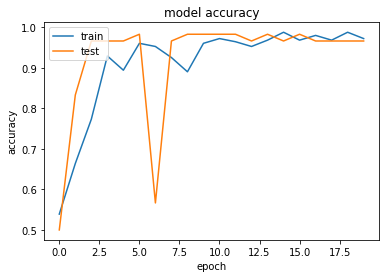

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

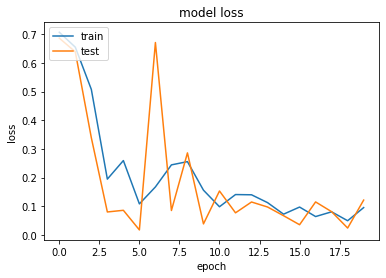

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_test=[]
y_actual=[]

In [0]:
for dir in os.listdir("CovidDataset/Val/Covid/"):
  img=image.load_img(path=os.path.join("CovidDataset/Val/Covid/",dir),target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  pred_label = np.argmax(p)
  y_test.append(pred_label)
  y_actual.append(0)

In [0]:
for dir in os.listdir("CovidDataset/Val/Normal/"):
  img=image.load_img(path=os.path.join("CovidDataset/Val/Normal/",dir),target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict(img)
  pred_label = np.argmax(p)
  y_test.append(pred_label)
  y_actual.append(1)

In [0]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)


In [0]:
cm=confusion_matrix(y_actual,y_test)

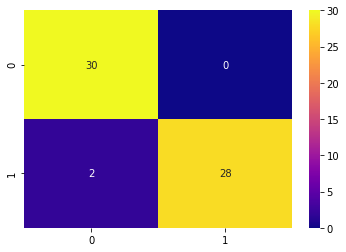

In [31]:
sns.heatmap(cm,cmap='plasma',annot=True)

In the confusion matrix it can be clearly seen only 2 x-ray images were wrongly classified

In [0]:
labels=['Covid','Normal']

VISUALISING WHAT OUR CNN MODEL IS ACTUALLY SEEING FOR CLASSIFICATION USING Grad-CAM (Gradient Class Activation Mapping)

In [0]:
layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

def keras_grad_cam (image, model,l, show_heatmap=False):
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    pred_label = labels[np.argmax(preds)]
    act_label = l
    
    class_idxs_sorted = np.argsort(preds.flatten())[::-1]
    class_idx = class_idxs_sorted[0]

    # Getting the last predicted layer
    layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
    # Getting the final conv layer
    penultimate_layer_idx = utils.find_layer_idx(model, "conv2d_10") 
    # Getting the heat map using keras-vis
    heatmap  = visualize_cam(model, layer_idx, class_idx, image, penultimate_layer_idx = penultimate_layer_idx,backprop_modifier= None,grad_modifier= None)
    if show_heatmap:        
        plt.imshow(heatmap)        
    return heatmap, pred_label, act_label

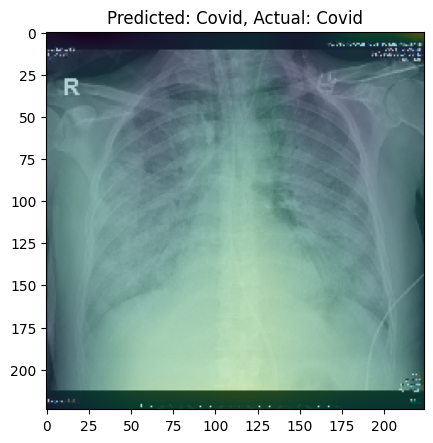

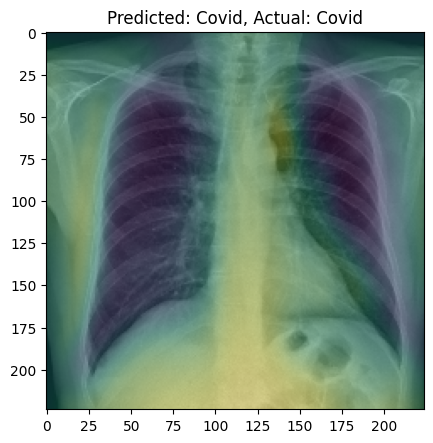

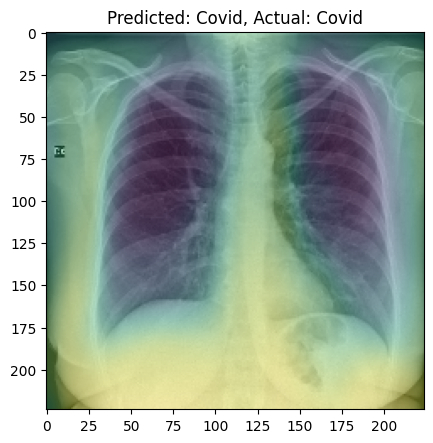

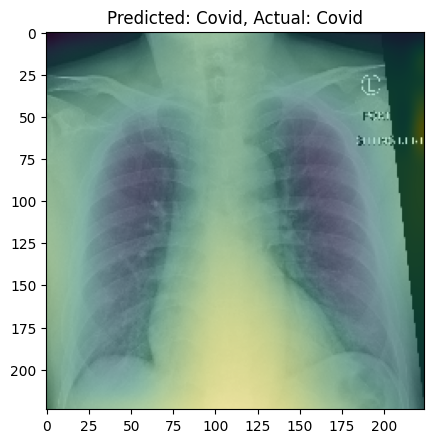

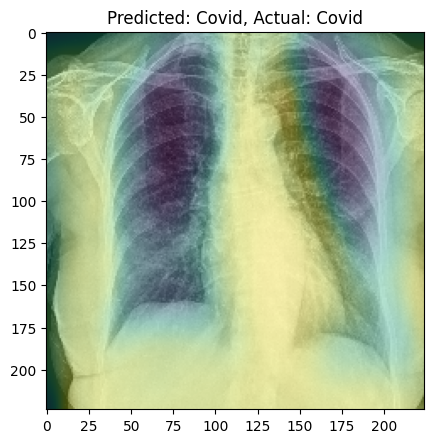

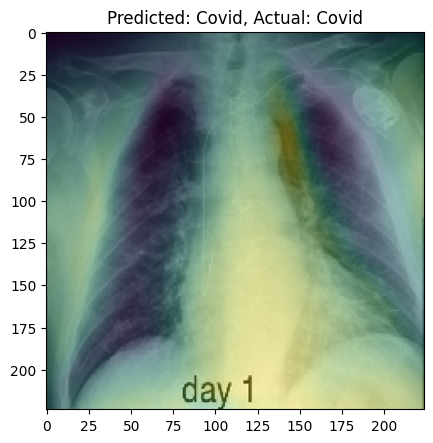

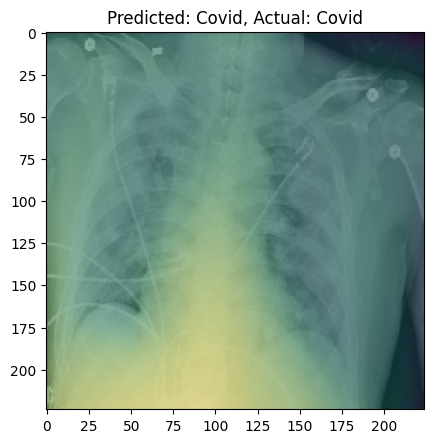

In [70]:
i=0
for dir in os.listdir("CovidDataset/Val/Covid/"):
  input_image=keras.preprocessing.image.load_img(path=os.path.join("CovidDataset/Val/Covid/",dir),target_size=(224,224))
  img=keras.preprocessing.image.img_to_array(input_image)
  heatmap, pred_label, act_label = keras_grad_cam( img, model,"Covid", show_heatmap=False)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.title(f"Predicted: {pred_label}, Actual: {act_label}")
  plt.imshow(input_image)
  plt.imshow(heatmap,alpha=0.35)
  plt.show()
  if(i>5):
    break
  i+=1

THE HEATMAP MARKS THE REGION OUR MODEL IS TRYING TO CLASSIFY UPON. THE REGIONS MARKED THE MOST BRIGHTEST CAN BE IN ACTUAL SUPERVISED BY A MEDICAL PROFESSIONAL AND FURTHER DECIDE UPON APPROPRIATE ACTIONS. AS CAN BE SEEN FROM ABOVE IMAGES THE MODEL IS TRYING TO INFER INFECTIONS IN THE RESPIRATORY TRACTS, A PROBABLE CAUSE FOR COVID-19

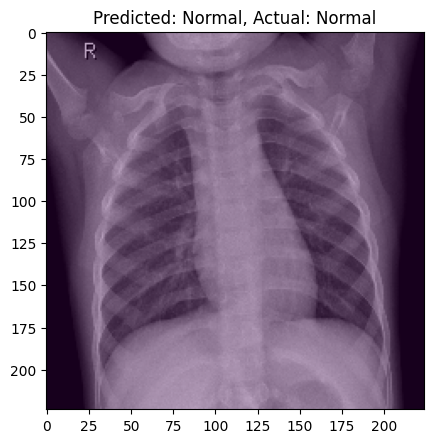

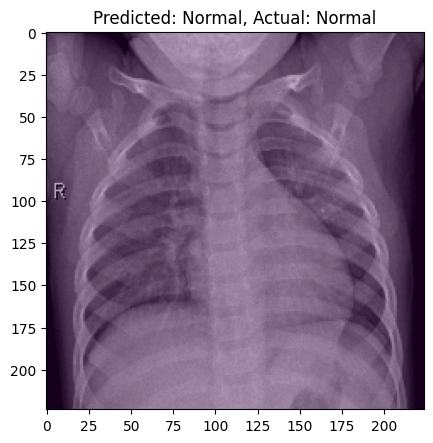

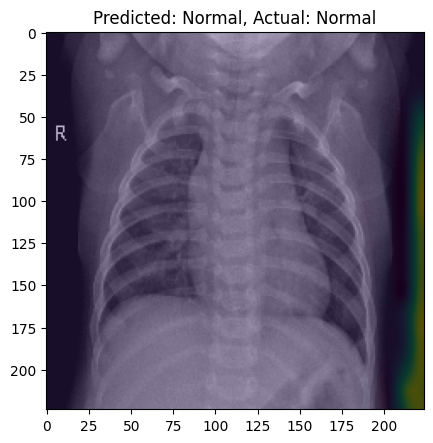

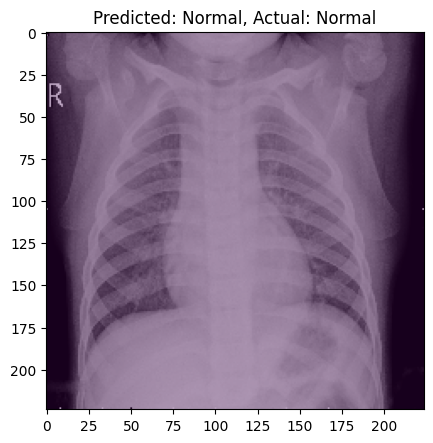

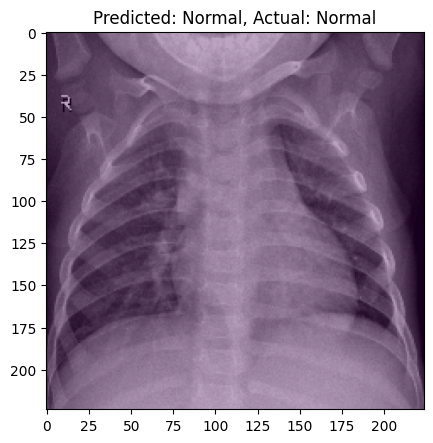

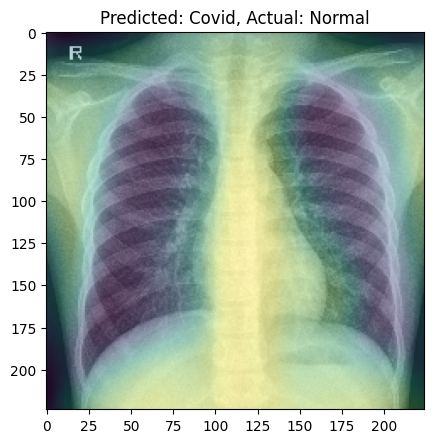

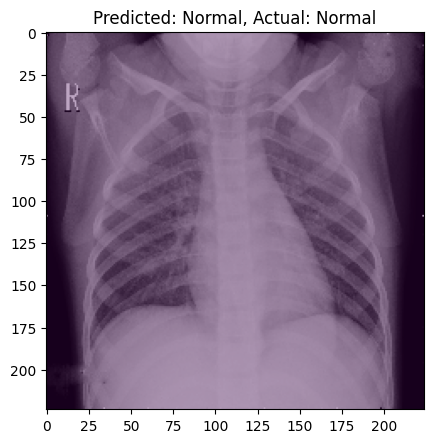

In [71]:
i=0
for dir in os.listdir("CovidDataset/Val/Normal/"):
  input_image=keras.preprocessing.image.load_img(path=os.path.join("CovidDataset/Val/Normal/",dir),target_size=(224,224))
  img=keras.preprocessing.image.img_to_array(input_image)
  heatmap, pred_label, act_label = keras_grad_cam( img, model,"Normal", show_heatmap=False)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.title(f"Predicted: {pred_label}, Actual: {act_label}")
  plt.imshow(input_image)
  plt.imshow(heatmap,alpha=0.35)
  plt.show()
  if(i>5):
    break
  i+=1

FROM ABOVE HEATMAPS IT CAN BE SEEN THAT OUR MODEL SEES SOME PARTICULAR VULNERABILITIES ON THE BASIS OF WHICH IT DECIDES WHETHER THE XRAY IS NORMAL OR COVID AFFECTED. THE HEAT MAP ISN'T VISIBLE IN NORMAL X-RAYS BECAUSE THE MODEL COULDN'T FIND ANY VULNERABILITIES OR INFECTIONS.
